<a href="https://colab.research.google.com/github/Gracia123/Sales-Prediction/blob/main/CS680_A4_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PART** **1**

170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32) 

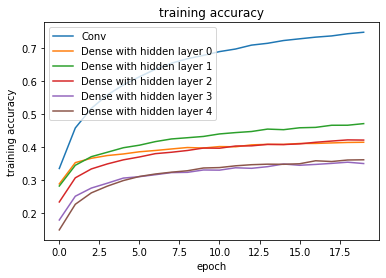

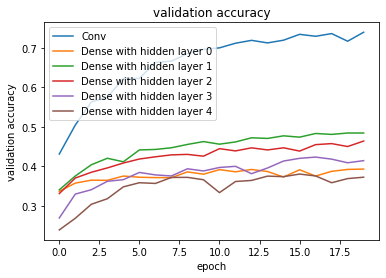

313/313 [==============================] - 1s 2ms/step - loss: 0.7856 - accuracy: 0.7376
Test accuracy of CNN: 0.7376000285148621
313/313 [==============================] - 1s 2ms/step - loss: 1.7411 - accuracy: 0.3956
Test accuracy of Hidden Layer - 0: 0.39559999108314514
313/313 [==============================] - 1s 2ms/step - loss: 1.4686 - accuracy: 0.4804
Test accuracy of Hidden Layer - 1: 0.4803999960422516
313/313 [==============================] - 1s 2ms/step - loss: 1.5284 - accuracy: 0.4652
Test accuracy of Hidden Layer - 2: 0.4652000069618225
313/313 [==============================] - 1s 2ms/step - loss: 1.7124 - accuracy: 0.4343
Test accuracy of Hidden Layer - 3: 0.4343000054359436
313/313 [==============================] - 1s 2ms/step - loss: 1.8195 - accuracy: 0.3861
Test accuracy of Hidden Layer - 4: 0.38609999418258667


In [ ]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model])
    
# With Hidden layer 0
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# Define a Dense neural network with 0 hidden layer
model_HL_0 = Sequential()
model_HL_0.add(Flatten(input_shape=x_train.shape[1:]))
model_HL_0.add(Dense(num_classes))
model_HL_0.add(Activation('softmax'))


# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model_HL_0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model_HL_0.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_1 = ModelCheckpoint('best_model_1.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_HL_0.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_1])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model_HL_0.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_1])
    

# 1 Hidden Layer
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a Dense neural network with 1 hidden layer
model_HL_1 = Sequential()
model_HL_1.add(Flatten(input_shape=x_train.shape[1:]))
model_HL_1.add(Dense(512))
model_HL_1.add(Activation('relu'))
model_HL_1.add(Dropout(0.5))
model_HL_1.add(Dense(num_classes))
model_HL_1.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model_HL_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model_HL_1.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_2 = ModelCheckpoint('best_model_2.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_HL_1.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_2])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model_HL_1.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_2])
    
# 2 Hidden Layers
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a Dense neural network with 2 hidden layer
model_HL_2 = Sequential()
model_HL_2.add(Flatten(input_shape=x_train.shape[1:]))
model_HL_2.add(Dense(512))
model_HL_2.add(Activation('relu'))
model_HL_2.add(Dropout(0.5))
model_HL_2.add(Dense(512))
model_HL_2.add(Activation('relu'))
model_HL_2.add(Dropout(0.5))
model_HL_2.add(Dense(num_classes))
model_HL_2.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model_HL_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model_HL_2.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_3 = ModelCheckpoint('best_model_3.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_HL_2.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_3])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model_HL_2.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_3])
    
# 3 Hidden Layer
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = True

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a Dense neural network with 3 hidden layer
model_HL_3 = Sequential()
model_HL_3.add(Flatten(input_shape=x_train.shape[1:]))
model_HL_3.add(Dense(512))
model_HL_3.add(Activation('relu'))
model_HL_3.add(Dropout(0.5))
model_HL_3.add(Dense(512))
model_HL_3.add(Activation('relu'))
model_HL_3.add(Dropout(0.5))
model_HL_3.add(Dense(512))
model_HL_3.add(Activation('relu'))
model_HL_3.add(Dropout(0.5))
model_HL_3.add(Dense(num_classes))
model_HL_3.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model_HL_3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model_HL_3.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_4 = ModelCheckpoint('best_model_4.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_HL_3.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_4])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model_HL_3.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_4])
    

# 4 Hidden Layer
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a Dense neural network with 4 hidden layer
model_HL_4 = Sequential()
model_HL_4.add(Flatten(input_shape=x_train.shape[1:]))
model_HL_4.add(Dense(512))
model_HL_4.add(Activation('relu'))
model_HL_4.add(Dropout(0.5))
model_HL_4.add(Dense(512))
model_HL_4.add(Activation('relu'))
model_HL_4.add(Dropout(0.5))
model_HL_4.add(Dense(512))
model_HL_4.add(Activation('relu'))
model_HL_4.add(Dropout(0.5))
model_HL_4.add(Dense(512))
model_HL_4.add(Activation('relu'))
model_HL_4.add(Dropout(0.5))
model_HL_4.add(Dense(num_classes))
model_HL_4.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model_HL_4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model_HL_4.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_5 = ModelCheckpoint('best_model_5.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_HL_4.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_5])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model_HL_4.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_5])
    

# Plot training accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model_HL_0.history.history['accuracy'])
plt.plot(model_HL_1.history.history['accuracy'])
plt.plot(model_HL_2.history.history['accuracy'])
plt.plot(model_HL_3.history.history['accuracy'])
plt.plot(model_HL_4.history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv','Dense with hidden layer 0','Dense with hidden layer 1','Dense with hidden layer 2','Dense with hidden layer 3','Dense with hidden layer 4'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(model.history.history['val_accuracy'])
plt.plot(model_HL_0.history.history['val_accuracy'])
plt.plot(model_HL_1.history.history['val_accuracy'])
plt.plot(model_HL_2.history.history['val_accuracy'])
plt.plot(model_HL_3.history.history['val_accuracy'])
plt.plot(model_HL_4.history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv','Dense with hidden layer 0','Dense with hidden layer 1','Dense with hidden layer 2','Dense with hidden layer 3','Dense with hidden layer 4'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy of CNN:', scores[1])
saved_model_1 = load_model('best_model_1.h5')
scores1 = saved_model_1.evaluate(x_test, y_test, verbose=1)
print('Test accuracy of Hidden Layer - 0:', scores1[1])
saved_model_2 = load_model('best_model_2.h5')
scores2 = saved_model_2.evaluate(x_test, y_test, verbose=1)
print('Test accuracy of Hidden Layer - 1:', scores2[1])
saved_model_3 = load_model('best_model_3.h5')
scores3 = saved_model_3.evaluate(x_test, y_test, verbose=1)
print('Test accuracy of Hidden Layer - 2:', scores3[1])
saved_model_4 = load_model('best_model_4.h5')
scores4 = saved_model_4.evaluate(x_test, y_test, verbose=1)
print('Test accuracy of Hidden Layer - 3:', scores4[1])
saved_model_5 = load_model('best_model_5.h5')
scores5 = saved_model_5.evaluate(x_test, y_test, verbose=1)
print('Test accuracy of Hidden Layer - 4:', scores5[1])


  As seen from above, it can be observed that CNN has the best test accuracy which is also visible in the graphs. CNN is much better than the the accuracy of simple dense neural networks with 0, 1, 2, 3 and 4 hidden layers, because CNN has a sparse interaction hence it has fewer connections, which results in parameter sharing - fewer weights. Thus simplifying the optimization. 
The results for the 5 hidden layers are much lower than CNN because as the number of hidden layers increase, optimization gets more and more difficult, and it becomes difficult to calculate/find the best weights.

### **PART 2**

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_28 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_______________________________________________

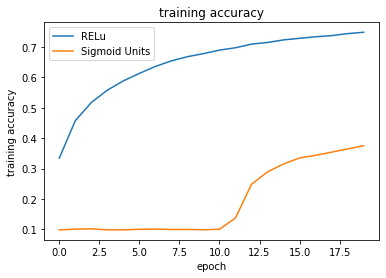

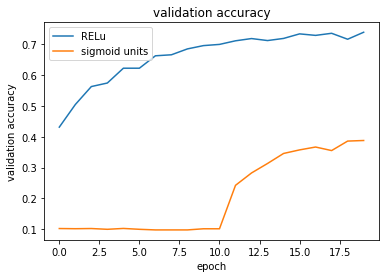

313/313 [==============================] - 1s 3ms/step - loss: 0.7856 - accuracy: 0.7376
Test accuracy for Rectified Linear Units: 0.7376000285148621
313/313 [==============================] - 1s 3ms/step - loss: 1.6728 - accuracy: 0.4001
Test accuracy for Sigmoid Units: 0.4000999927520752


In [ ]:
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a convolutional neural network
model_sig = Sequential()
model_sig.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_sig.add(Activation('sigmoid'))
model_sig.add(Conv2D(32, (3, 3), padding='same'))
model_sig.add(Activation('sigmoid'))
model_sig.add(MaxPooling2D(pool_size=(2, 2)))
model_sig.add(Dropout(0.25))

model_sig.add(Conv2D(64, (3, 3), padding='same'))
model_sig.add(Activation('sigmoid'))
model_sig.add(Conv2D(64, (3, 3), padding='same'))
model_sig.add(Activation('sigmoid'))
model_sig.add(MaxPooling2D(pool_size=(2, 2)))
model_sig.add(Dropout(0.25))

model_sig.add(Flatten())
model_sig.add(Dense(512))
model_sig.add(Activation('sigmoid'))
model_sig.add(Dropout(0.5))
model_sig.add(Dense(num_classes))
model_sig.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model_sig.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model_sig.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_6 = ModelCheckpoint('best_model_6.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_sig.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_6])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model_sigm.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_6])
    
# Plot training accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model_sig.history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['RELu','Sigmoid Units'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(model.history.history['val_accuracy'])
plt.plot(model_sig.history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['RELu','sigmoid units'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model = load_model('best_model.h5')
scores = saved_model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for Rectified Linear Units:', scores[1])
saved_model_6 = load_model('best_model_6.h5')
scores6 = saved_model_6.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for Sigmoid Units:', scores6[1])

From the results obtained, the test accuracy for rectified linear units (ReLU) is much higher than that of sigmoid units.The main reasons why ReLUis better is due to sparsity and reduced likelihood of vanishing gradient. When sigmoid units are used, it suffers because of the vanishing gradient problem, which makes learning iterations slower thus leading to a slower convergence when compared to ReLU. Another reason for the slow convergence is because with sigmoid activation, the gradient tends to go to zero if the input is very large or very small and with this gradient going to zero, a slow convergence is expected. 

### **PART** **3**

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_45 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_46 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 16, 16, 32)        0         
______________________________________________

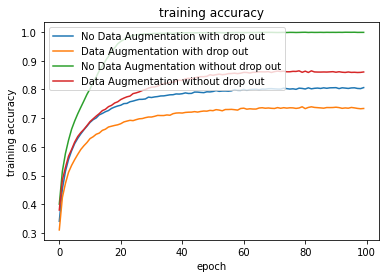

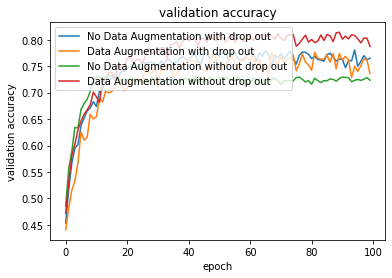

313/313 [==============================] - 1s 2ms/step - loss: 0.7169 - accuracy: 0.7751
Test accuracy for No Data Augmentation + drop out: 0.7750999927520752
313/313 [==============================] - 1s 3ms/step - loss: 0.7009 - accuracy: 0.7735
Test accuracy for Data Augmentation + drop out: 0.7735000252723694
313/313 [==============================] - 1s 3ms/step - loss: 0.9140 - accuracy: 0.7249
Test accuracy for No Data Augmentation + No drop out: 0.7249000072479248
313/313 [==============================] - 1s 3ms/step - loss: 0.6542 - accuracy: 0.8125
Test accuracy for Data Augmentation + No drop out: 0.8125


In [ ]:
# No Data Augmentation + drop out
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a convolutional neural network
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_1 = ModelCheckpoint('best_model_1.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_1])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_1])
    
# Data augmentation + Dropout
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a convolutional neural network
model_dd_0 = Sequential()
model_dd_0.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_dd_0.add(Activation('relu'))
model_dd_0.add(Conv2D(32, (3, 3), padding='same'))
model_dd_0.add(Activation('relu'))
model_dd_0.add(MaxPooling2D(pool_size=(2, 2)))
model_dd_0.add(Dropout(0.25))

model_dd_0.add(Conv2D(64, (3, 3), padding='same'))
model_dd_0.add(Activation('relu'))
model_dd_0.add(Conv2D(64, (3, 3), padding='same'))
model_dd_0.add(Activation('relu'))
model_dd_0.add(MaxPooling2D(pool_size=(2, 2)))
model_dd_0.add(Dropout(0.25))

model_dd_0.add(Flatten())
model_dd_0.add(Dense(512))
model_dd_0.add(Activation('relu'))
model_dd_0.add(Dropout(0.5))
model_dd_0.add(Dense(num_classes))
model_dd_0.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model_dd_0.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model_dd_0.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_dd_0 = ModelCheckpoint('best_model_dd_0.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_dd_0.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_dd_0])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model_dd_0.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_dd_0])


# No data augmentation + no drop out
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a convolutional neural network
model_dd_1 = Sequential()
model_dd_1.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_dd_1.add(Activation('relu'))
model_dd_1.add(Conv2D(32, (3, 3), padding='same'))
model_dd_1.add(Activation('relu'))
model_dd_1.add(MaxPooling2D(pool_size=(2, 2)))


model_dd_1.add(Conv2D(64, (3, 3), padding='same'))
model_dd_1.add(Activation('relu'))
model_dd_1.add(Conv2D(64, (3, 3), padding='same'))
model_dd_1.add(Activation('relu'))
model_dd_1.add(MaxPooling2D(pool_size=(2, 2)))


model_dd_1.add(Flatten())
model_dd_1.add(Dense(512))
model_dd_1.add(Activation('relu'))

model_dd_1.add(Dense(num_classes))
model_dd_1.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model_dd_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model_dd_1.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_dd_1 = ModelCheckpoint('best_model_dd_1.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_dd_1.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_dd_1])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model_dd_1.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_dd_1])
    

# Data augmentation + no drop out
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a convolutional neural network
model_dd_2 = Sequential()
model_dd_2.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_dd_2.add(Activation('relu'))
model_dd_2.add(Conv2D(32, (3, 3), padding='same'))
model_dd_2.add(Activation('relu'))
model_dd_2.add(MaxPooling2D(pool_size=(2, 2)))


model_dd_2.add(Conv2D(64, (3, 3), padding='same'))
model_dd_2.add(Activation('relu'))
model_dd_2.add(Conv2D(64, (3, 3), padding='same'))
model_dd_2.add(Activation('relu'))
model_dd_2.add(MaxPooling2D(pool_size=(2, 2)))


model_dd_2.add(Flatten())
model_dd_2.add(Dense(512))
model_dd_2.add(Activation('relu'))

model_dd_2.add(Dense(num_classes))
model_dd_2.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model_dd_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model_dd_2.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_dd_2 = ModelCheckpoint('best_model_dd_2.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_dd_2.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_dd_2])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model_dd_2.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_dd_2])
    

# Plot training accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model_dd_0.history.history['accuracy'])
plt.plot(model_dd_1.history.history['accuracy'])
plt.plot(model_dd_2.history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['No Data Augmentation with drop out','Data Augmentation with drop out','No Data Augmentation without drop out','Data Augmentation without drop out'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(model.history.history['val_accuracy'])
plt.plot(model_dd_0.history.history['val_accuracy'])
plt.plot(model_dd_1.history.history['val_accuracy'])
plt.plot(model_dd_2.history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['No Data Augmentation with drop out','Data Augmentation with drop out','No Data Augmentation without drop out','Data Augmentation without drop out'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_1 = load_model('best_model_1.h5')
scores_1 = saved_model_1.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for No Data Augmentation + drop out:', scores_1[1])
saved_model_dd_0 = load_model('best_model_dd_0.h5')
scores_dd_0 = saved_model_dd_0.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for Data Augmentation + drop out:', scores_dd_0[1])
saved_model_dd_1 = load_model('best_model_dd_1.h5')
scores_dd_1 = saved_model_dd_1.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for No Data Augmentation + No drop out:', scores_dd_1[1])
saved_model_dd_2 = load_model('best_model_dd_2.h5')
scores_dd_2 = saved_model_dd_2.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for Data Augmentation + No drop out:', scores_dd_2[1])

From the above graphs, it is visible that as the curves reach 100 epochs, for both, the training and validation accuracy, a steady rise in the curves are observed for a convergence and the curve without dropout and without data augmentation learns the fastest but has the lowest validation accuracy. But the most overfitting also occurs as the number of iterations increase. Data augmentation helps radically improve generalization. Dropout helps to improve generalization when there is no data augmentation, but the results are worse when there is data augmentation.
Data augmentation and drop out are both used as means of regularization to increase the generalizability to new data. The reason we observe a small gap between the  is a reflection of the generalizing of new data, and an improvement is is observed when we use the above methods when compared to the rest.


### **PART 4**

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_69 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_70 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 16, 16, 32)        0         
______________________________________________

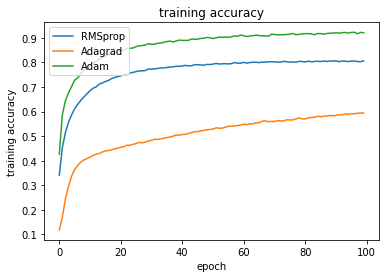

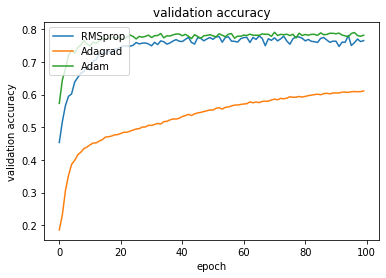

313/313 [==============================] - 1s 2ms/step - loss: 0.7169 - accuracy: 0.7751
Test accuracy for RMSprop: 0.7750999927520752
313/313 [==============================] - 1s 2ms/step - loss: 1.1032 - accuracy: 0.6090
Test accuracy for Adagrad: 0.609000027179718
313/313 [==============================] - 1s 2ms/step - loss: 0.9259 - accuracy: 0.7797
Test accuracy for Adam: 0.779699981212616


In [ ]:
#Adam optimizer
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a convolutional neural network
model_adam = Sequential()
model_adam.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_adam.add(Activation('relu'))
model_adam.add(Conv2D(32, (3, 3), padding='same'))
model_adam.add(Activation('relu'))
model_adam.add(MaxPooling2D(pool_size=(2, 2)))
model_adam.add(Dropout(0.25))

model_adam.add(Conv2D(64, (3, 3), padding='same'))
model_adam.add(Activation('relu'))
model_adam.add(Conv2D(64, (3, 3), padding='same'))
model_adam.add(Activation('relu'))
model_adam.add(MaxPooling2D(pool_size=(2, 2)))
model_adam.add(Dropout(0.25))

model_adam.add(Flatten())
model_adam.add(Dense(512))
model_adam.add(Activation('relu'))
model_adam.add(Dropout(0.5))
model_adam.add(Dense(num_classes))
model_adam.add(Activation('softmax'))

# initiate Adam optimizer
opt = keras.optimizers.Adam()

# Compile the model before using it
model_adam.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model_adam.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_adam = ModelCheckpoint('best_model_adam.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_adam.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_adam])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model_adam.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_adam])
    
# Adagrad optimizer
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a convolutional neural network
model_adagrad = Sequential()
model_adagrad.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_adagrad.add(Activation('relu'))
model_adagrad.add(Conv2D(32, (3, 3), padding='same'))
model_adagrad.add(Activation('relu'))
model_adagrad.add(MaxPooling2D(pool_size=(2, 2)))
model_adagrad.add(Dropout(0.25))

model_adagrad.add(Conv2D(64, (3, 3), padding='same'))
model_adagrad.add(Activation('relu'))
model_adagrad.add(Conv2D(64, (3, 3), padding='same'))
model_adagrad.add(Activation('relu'))
model_adagrad.add(MaxPooling2D(pool_size=(2, 2)))
model_adagrad.add(Dropout(0.25))

model_adagrad.add(Flatten())
model_adagrad.add(Dense(512))
model_adagrad.add(Activation('relu'))
model_adagrad.add(Dropout(0.5))
model_adagrad.add(Dense(num_classes))
model_adagrad.add(Activation('softmax'))

# initiate Adagrad optimizer
opt = keras.optimizers.Adagrad()

# Compile the model before using it
model_adagrad.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model_adagrad.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_adagrad = ModelCheckpoint('best_model_adagrad.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_adagrad.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_adagrad])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model_adagrad.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_adagrad])
    
    
# Plot training accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model_adagrad.history.history['accuracy'])
plt.plot(model_adam.history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop','Adagrad','Adam'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(model.history.history['val_accuracy'])
plt.plot(model_adagrad.history.history['val_accuracy'])
plt.plot(model_adam.history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop','Adagrad','Adam'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_1 = load_model('best_model_1.h5')
scores_1 = saved_model_1.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for RMSprop:', scores_1[1])
saved_model_adagrad = load_model('best_model_adagrad.h5')
scores_adagrad = saved_model_adagrad.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for Adagrad:', scores_adagrad[1])
saved_model_adam = load_model('best_model_adam.h5')
scores_adam = saved_model_adam.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for Adam:', scores_adam[1])

As it can be observed, Adam optimizer has a better test accuracy value when compared to RMSProp and Adagrad.

AdaGrad uses Adaptive gradients — it has a different learning rate for every single parameter in the neural network. Adagrad adapts the learning rate to the parameters, performing smaller updates for parameters associated with frequently occurring features, and larger updates for parameters associated with infrequent features. For this reason, it is well-suited for dealing with sparse data. But Adagrad has the issue of drastically diminishing learning rates. Adagrad also doesn't have the denominator decay, hence it is dominated by it as the number of iterations increases. AdaGrad has a problem where after a few batches, the learning rates become low — resulting in a long training time. Whereas, RMSProp tries to solve this problem by exponentially decaying the learning rates which makes RMSProp more volatile. RMSprop is an extension of Adagrad that deals with its diminishing learning rates. The convergence of the RMSProp optimizer improves on adagrad by having the denominator decay proportional to the decay of the learning rate. While Adam, like the other 2 optimizers also uses past learning rate but Adam also uses past gradients to speed up learning. But Adam improves on the convergence by keeping track of the the past iterations cumulatively. Adam optimizer uses a bias correction which helps it outshine RMSProp and Adagrad wrt the training and validation accuracy.

### **PART 5**

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_81 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 64)        51264     
_________________________________________________________________
activation_82 (Activation)   (None, 16, 16, 64)        0         
______________________________________________

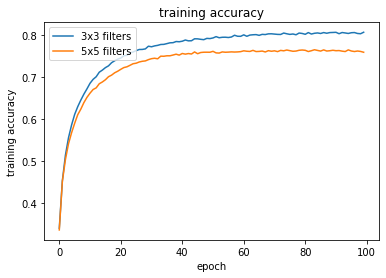

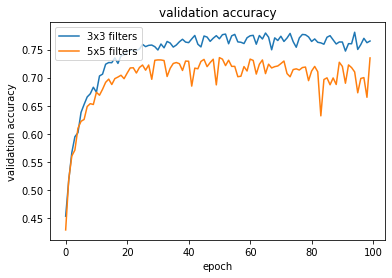

313/313 [==============================] - 1s 2ms/step - loss: 0.7169 - accuracy: 0.7751
Test accuracy for 3x3 filters: 0.7750999927520752
313/313 [==============================] - 1s 2ms/step - loss: 0.9054 - accuracy: 0.7306
Test accuracy for 5x5 filters: 0.7305999994277954


In [ ]:
# parameters for this script
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = False

# Load the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define a convolutional neural network
model_5x5 = Sequential()
model_5x5.add(Conv2D(32, (5, 5), padding='same',input_shape=x_train.shape[1:]))
model_5x5.add(Activation('relu'))
model_5x5.add(MaxPooling2D(pool_size=(2, 2)))
model_5x5.add(Dropout(0.25))

model_5x5.add(Conv2D(64, (5, 5), padding='same'))
model_5x5.add(Activation('relu'))
model_5x5.add(MaxPooling2D(pool_size=(2, 2)))
model_5x5.add(Dropout(0.25))

model_5x5.add(Flatten())
model_5x5.add(Dense(512))
model_5x5.add(Activation('relu'))
model_5x5.add(Dropout(0.5))
model_5x5.add(Dense(num_classes))
model_5x5.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile the model before using it
model_5x5.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model_5x5.summary())

# normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# partition training set into training and validation set
x_validate = x_train[40000:,:]
x_train = x_train[:40000,:]
y_validate = y_train[40000:,:]
y_train = y_train[:40000,:]

# create a callback that will save the best model while training
save_best_model_5x5 = ModelCheckpoint('best_model_5x5.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=0)

# train without data augmentation
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_5x5.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model_5x5])

# train with data augmentation
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model_5x5.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model_5x5])
    

# Plot training accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model_5x5.history.history['accuracy'])
plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['3x3 filters','5x5 filters'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(model.history.history['val_accuracy'])
plt.plot(model_5x5.history.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['3x3 filters','5x5 filters'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_1 = load_model('best_model_1.h5')
scores_1 = saved_model_1.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for 3x3 filters:', scores_1[1])
saved_model_5x5 = load_model('best_model_5x5.h5')
scores_5x5 = saved_model_5x5.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for 5x5 filters:', scores_5x5[1])

From the above results it can be observed that, both the training and validation, the 3x3 filter architecture performs comparitively better. 
Having 2 layers of conv2D gives more flexibility which gives the ability to express non-linear transformation without loosing much information. 
Using maxpooling an dropout, it becomes more difficult to propogate information. Using 2 layers of conv2D makes it easier to learn without much loss of information. Using a smaller kernel size (3x3) also helps reduce weight sharing which in turn implicates lesser weights that are used for backpropagation which further improves its perfomance and gives it an edge over the 5x5 filter.
